In [51]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import categorical_accuracy
from sklearn.metrics import confusion_matrix

In [52]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [53]:
print("Data Shape for Training", x_train.shape)
print("Label Shape for Training", y_train.shape)
print("Data shape for Testing", x_test.shape)
print("Label Shape for Testing", y_test.shape)

Data Shape for Training (60000, 28, 28)
Label Shape for Training (60000,)
Data shape for Testing (10000, 28, 28)
Label Shape for Testing (10000,)


In [54]:
no_of_class = len(np.unique(y_train))
label_class = np.unique(y_train)
print("Total number of classes", no_of_class)
print("Lables for class", label_class)

Total number of classes 10
Lables for class [0 1 2 3 4 5 6 7 8 9]


<function matplotlib.pyplot.show(close=None, block=None)>

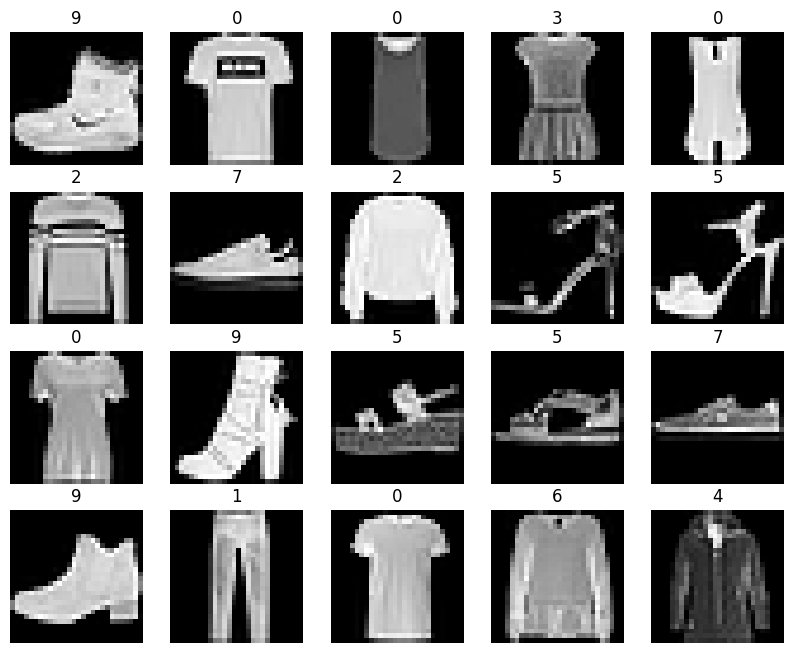

In [55]:
plt.figure(figsize=(10,10))
for i in range (20):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(label_class[y_train[i]])
    plt.axis('off')
plt.show

In [56]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [57]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [58]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5145 - accuracy: 0.8187 - val_loss: 0.4037 - val_accuracy: 0.8562
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3814 - accuracy: 0.8621 - val_loss: 0.3918 - val_accuracy: 0.8542
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3434 - accuracy: 0.8729 - val_loss: 0.3587 - val_accuracy: 0.8714
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3170 - accuracy: 0.8824 - val_loss: 0.3515 - val_accuracy: 0.8735
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2990 - accuracy: 0.8889 - val_loss: 0.3283 - val_accuracy: 0.8788
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2827 - accuracy: 0.8949 - val_loss: 0.3275 - val_accuracy: 0.8844
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2694 - accuracy: 0.8998 - val_loss: 0.3281 - val_accuracy:

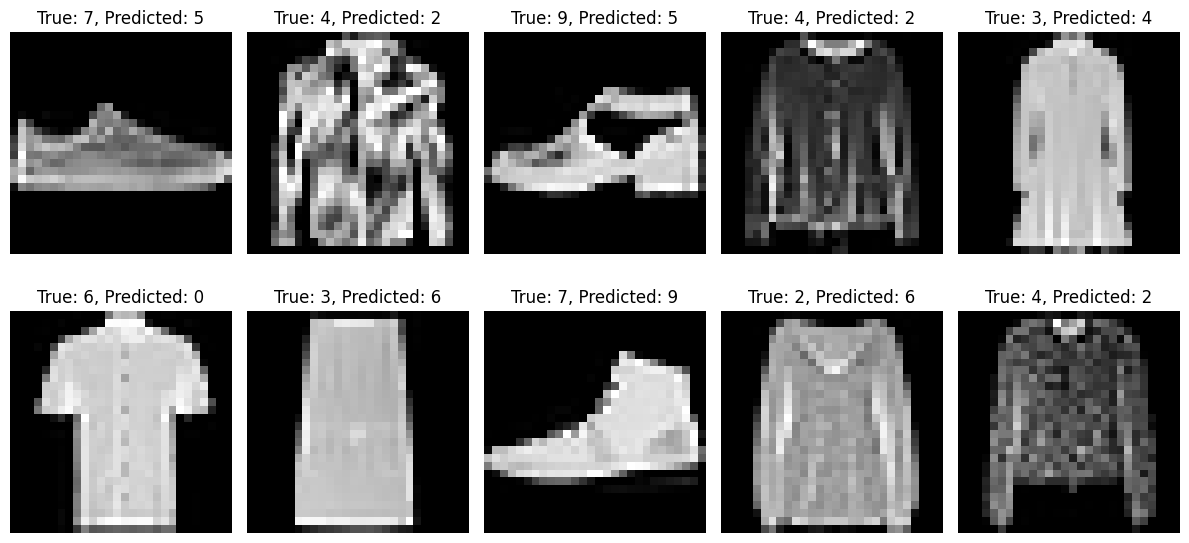

In [59]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  
model.add(Dense(128, activation='relu'))  
model.add(Dense(64, activation='relu'))   
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

confusion_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(confusion_matrix)

incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

plt.figure(figsize=(12, 6))
for i, incorrect_index in enumerate(incorrect_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[incorrect_index], cmap='gray')
    plt.title(f"True: {y_true_classes[incorrect_index]}, Predicted: {y_pred_classes[incorrect_index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
